In [1]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('/home/chenghung/DoTA/input/rf_data/human_weight_rf_data.pickle', mode='rb') as fh:
    x_data, y, tf_list = pickle.load(fh)
    data_order = y[['Gene', 'Tissue']]
    y_data = y['PSI']

In [3]:
# Create psi table
psi_df = y.pivot(index='Gene', columns='Tissue')['PSI']

In [4]:
# Remove genes with less than 3 events
psi_df = psi_df[psi_df.notna().sum(axis=1) > 2]

# Calculate stdev
psi_stdev = psi_df.std(axis=1, ddof=0)

# Drop genes with no stdev across different tissues
keep_idx = psi_stdev[psi_stdev != 0].index
psi_df = psi_df.loc[keep_idx]
psi_stdev = psi_stdev[keep_idx]
psi_mean = psi_df.mean(axis=1)

In [5]:
# Calculate psi range of each genes
psi_range = psi_df.max(axis=1) - psi_df.min(axis=1)

In [6]:
sns.set(style='darkgrid', rc={'figure.dpi': 100})

(0, 11000)

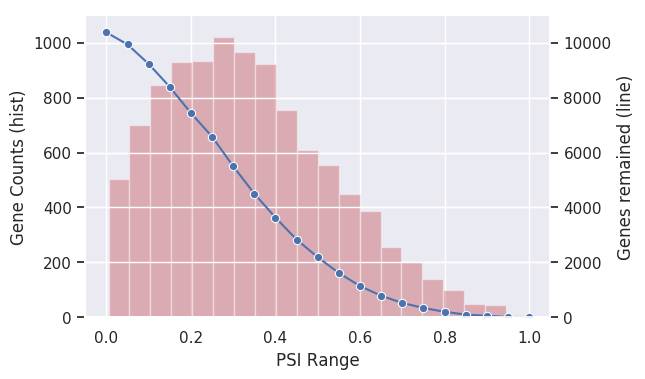

In [7]:
fig, ax = plt.subplots()
gene_remain = []
for cutoff in np.arange(0, 1.05, 0.05):
    gene_remain.append([cutoff, (psi_range >= cutoff).sum(), 'Gene'])
gene_remain_df = pd.DataFrame(gene_remain, columns=['Cutoff', 'Count', 'hue'])

# Histogram of psi range distribution
sns.distplot(psi_range, kde=False, norm_hist=False, bins=20, ax=ax, color='r')
ax.set_xlabel('PSI Range')
ax.set_ylabel('Gene Counts (hist)')
ax.set_ylim(0, 1100)

# Lineplot of genes remained after filtering by each psi-range criteria
ax2 = plt.twinx()
sns.lineplot(x='Cutoff', y='Count',
             hue='hue', style='hue',
             data=gene_remain_df, markers='o',
             legend=False, ax=ax2)
ax2.set_ylabel('Genes remained (line)')
ax2.set_ylim(0, 11000)